<h2>Primeiro, vamos importar as bibliotecas necessárias. Em seguida, criaremos um DataFrame a partir da base de dados 'Advertising Dataset', que foi obtida no Kaggle e está disponível <a href="https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset">aqui</a></h2>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
db = pd.read_csv('Advertising.csv')
db

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


<h2>Nesta etapa, vamos selecionar apenas as colunas 'TV' e 'Sales' do nosso DataFrame. Isso porque, para a regressão linear simples, precisamos de apenas uma variável independente (aqui, 'TV') para prever a variável dependente ('Sales').</h2>

In [3]:
db = db[['TV','Sales']]
db

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


<h2>A seguir, iremos implementar a função para calcular o Coeficiente Angular (β1​) e adicionar o resultado a uma nova coluna no DataFrame, denominada B1.</h2>
<br>
<img src="img/formula_b1.png" alt="Coeficiente Angular">

In [4]:
def calcular_b1(df):
    df_original = df.copy()
    df_calculos = df_original.copy()
    x = df_calculos['TV']
    y = df_calculos['Sales']

    media_x = x.mean()
    media_y = y.mean()

    df_calculos['x_menos_media_x'] = x - media_x
    df_calculos['y_menos_media_y'] = y - media_y
    df_calculos['produto_desvios'] = df_calculos['x_menos_media_x'] * df_calculos['y_menos_media_y']
    df_calculos['x_menos_media_x_quadrado'] = df_calculos['x_menos_media_x']**2

    numerador_beta1 = df_calculos['produto_desvios'].sum()
    denominador_beta1 = df_calculos['x_menos_media_x_quadrado'].sum()

    df_original['B1'] = numerador_beta1 / denominador_beta1
    return df_original, df_calculos

In [5]:
db, df_calculo = calcular_b1(db)
df_calculo

,TV,Sales,x_menos_media_x,y_menos_media_y,produto_desvios,x_menos_media_x_quadrado
0,230.1,22.1,83.0575,8.0775,670.896956,6898.548306
1,44.5,10.4,-102.5425,-3.6225,371.460206,10514.964306
2,17.2,9.3,-129.8425,-4.7225,613.181206,16859.074806
3,151.5,18.5,4.4575,4.4775,19.958456,19.869306
4,180.8,12.9,33.7575,-1.1225,-37.892794,1139.568806
...,...,...,...,...,...,...
195,38.2,7.6,-108.8425,-6.4225,699.040956,11846.689806
196,94.2,9.7,-52.8425,-4.3225,228.411706,2792.329806
197,177.0,12.8,29.9575,-1.2225,-36.623044,897.451806
198,283.6,25.5,136.5575,11.4775,1567.338706,18647.950806


In [6]:
# DataFrame principal
db

,TV,Sales,B1
0,230.1,22.1,0.047537
1,44.5,10.4,0.047537
2,17.2,9.3,0.047537
3,151.5,18.5,0.047537
4,180.8,12.9,0.047537
...,...,...,...
195,38.2,7.6,0.047537
196,94.2,9.7,0.047537
197,177.0,12.8,0.047537
198,283.6,25.5,0.047537


<h2>Agora vamos desenvolver a função para calcular o Coeficiente de Intercepto (β0​) e adicionar o resultado a uma nova coluna no DataFrame, denominada B0.</h2>
<br>
<img src="img/formula_b0.png" alt="Coeficiente Intercepto">

In [7]:
def calcular_b0(df):
    df_original = df.copy()
    # Obter as variáveis X e Y
    x = df_original['TV'].mean()
    y = df_original['Sales'].mean()

    print(f"Média de X (TV): {x:.2f}")
    print(f"Média de Y (Sales): {y:.2f}")
    print(f"Beta_1 utilizado: {df_original['B1'].iloc[0]:.4f}\n")

    # Calcular Beta_0
    df_original['B0'] = y - (df_original['B1'] * x)
    
    print(f"Beta_0 (intercepto) calculado: {df_original['B0'].iloc[0]:.4f}\n")

    return df_original

In [8]:
db = calcular_b0(db)
db

Média de X (TV): 147.04
Média de Y (Sales): 14.02
Beta_1 utilizado: 0.0475

Beta_0 (intercepto) calculado: 7.0326



,TV,Sales,B1,B0
0,230.1,22.1,0.047537,7.032594
1,44.5,10.4,0.047537,7.032594
2,17.2,9.3,0.047537,7.032594
3,151.5,18.5,0.047537,7.032594
4,180.8,12.9,0.047537,7.032594
...,...,...,...,...
195,38.2,7.6,0.047537,7.032594
196,94.2,9.7,0.047537,7.032594
197,177.0,12.8,0.047537,7.032594
198,283.6,25.5,0.047537,7.032594


<h2>A seguir, implementaremos a função que realizará a previsão de Y utilizando a variável X, aplicando a fórmula abaixo e adicionar o resultado a uma nova coluna no DataFrame.</h2>
<br>
<img src="img/formula_previsao.png" alt="Previsao">

In [9]:
def calcular_previsto(df_original):
    df_original['Previsto'] = df_original['B0'] + df_original['B1'] * df_original['TV']
    return df_original

In [10]:
db = calcular_previsto(db)
db

,TV,Sales,B1,B0,Previsto
0,230.1,22.1,0.047537,7.032594,17.970775
1,44.5,10.4,0.047537,7.032594,9.147974
2,17.2,9.3,0.047537,7.032594,7.850224
3,151.5,18.5,0.047537,7.032594,14.234395
4,180.8,12.9,0.047537,7.032594,15.627218
...,...,...,...,...,...
195,38.2,7.6,0.047537,7.032594,8.848493
196,94.2,9.7,0.047537,7.032594,11.510545
197,177.0,12.8,0.047537,7.032594,15.446579
198,283.6,25.5,0.047537,7.032594,20.513985


<h2>Nesta etapa, implementaremos a função para calcular o ϵ (erro residual) e adicionar o resultado ao DataFrame.</h2>
<br>
<img src="img/formula_e.png" alt="épsilon">


In [11]:
def calcular_epsilon(df_original):
    df_original['E'] = df_original['Sales'] -  df_original['Previsto']
    return df_original

In [12]:
db = calcular_epsilon(db)
db

,TV,Sales,B1,B0,Previsto,E
0,230.1,22.1,0.047537,7.032594,17.970775,4.129225
1,44.5,10.4,0.047537,7.032594,9.147974,1.252026
2,17.2,9.3,0.047537,7.032594,7.850224,1.449776
3,151.5,18.5,0.047537,7.032594,14.234395,4.265605
4,180.8,12.9,0.047537,7.032594,15.627218,-2.727218
...,...,...,...,...,...,...
195,38.2,7.6,0.047537,7.032594,8.848493,-1.248493
196,94.2,9.7,0.047537,7.032594,11.510545,-1.810545
197,177.0,12.8,0.047537,7.032594,15.446579,-2.646579
198,283.6,25.5,0.047537,7.032594,20.513985,4.986015


<h2>Nesta etapa, agora já temos todos os dados para validar a regressao temos que obter o valor de Y no caso Sales apartir da formula.</h2>
<br>
<img src="img/formula_rls.png" alt="Regressão Linear Simples">


In [13]:
db ['rls']= db['B0'] + db['B1'] * db['TV'] + db['E']
db

,TV,Sales,B1,B0,Previsto,E,rls
0,230.1,22.1,0.047537,7.032594,17.970775,4.129225,22.1
1,44.5,10.4,0.047537,7.032594,9.147974,1.252026,10.4
2,17.2,9.3,0.047537,7.032594,7.850224,1.449776,9.3
3,151.5,18.5,0.047537,7.032594,14.234395,4.265605,18.5
4,180.8,12.9,0.047537,7.032594,15.627218,-2.727218,12.9
...,...,...,...,...,...,...,...
195,38.2,7.6,0.047537,7.032594,8.848493,-1.248493,7.6
196,94.2,9.7,0.047537,7.032594,11.510545,-1.810545,9.7
197,177.0,12.8,0.047537,7.032594,15.446579,-2.646579,12.8
198,283.6,25.5,0.047537,7.032594,20.513985,4.986015,25.5


<h2>Para finalizar, vamos gerar um gráfico para visualizar a reta de regressão linear simples comparada aos valores reais de Y. Com ele, poderemos avaliar visualmente o desempenho do modelo e verificar se ele está em um nível aceitável.</h2>

Coeficiente de Intercepto (β0): 7.03
Coeficiente Angular (β1): 0.05
Formula da Regressão Linear: Sales = 0.05 * TV + 7.03


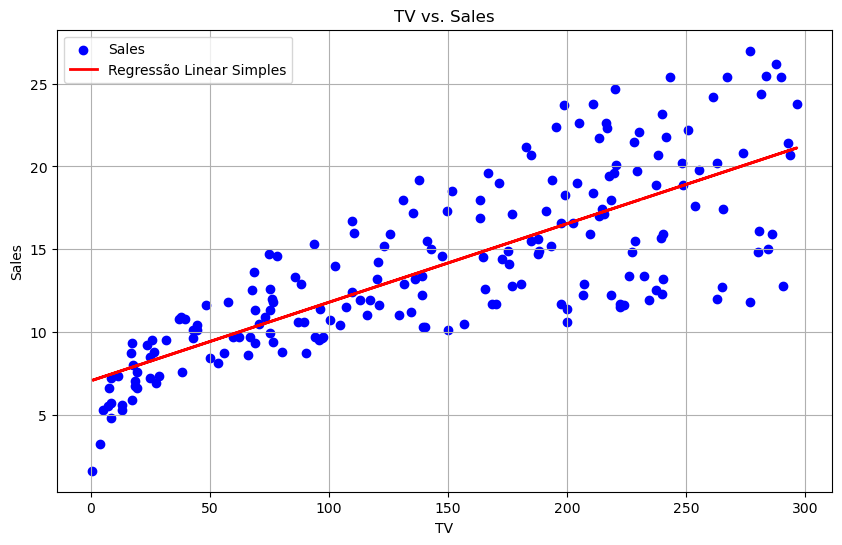

In [14]:
X = db[['TV']]  
y = db['Sales'] 

intercept = db['B0'].iloc[0]
coefficient = db['B1'].iloc[0]

print(f"Coeficiente de Intercepto (β0): {intercept:.2f}")
print(f"Coeficiente Angular (β1): {coefficient:.2f}")
print(f"Formula da Regressão Linear: Sales = {coefficient:.2f} * TV + {intercept:.2f}")

predictions = db['Previsto']

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Sales')
plt.plot(X, predictions, color='red', linewidth=2, label='Regressão Linear Simples')
plt.title('TV vs. Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()